## Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [3]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.ensemble import IsolationForest

## Loading & Understanding the dataset

In [5]:
# loading the dataset
data = pd.read_csv('insurance fraud claims.csv')

In [6]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# check for missing values
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# Identify replicated values
data.duplicated().sum()

0

## Data Cleaning and Preprocessing

In [11]:
# Drop irrelevant columns
data.drop(columns=['policy_number', 'insured_zip', 'incident_location', '_c39'], inplace=True)


In [12]:
# Fill missing values in 'authorities_contacted' with mode
data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0], inplace=True)


C:\Users\Amritha\AppData\Local\Temp\ipykernel_18120\81678093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0], inplace=True)


In [13]:
data['authorities_contacted'].isna().sum()

0

In [14]:
# Convert Dates to Useful Features

# # Convert date columns to datetime format
# data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
# data['incident_date'] = pd.to_datetime(data['incident_date'])

# # Extract useful features
# data['policy_year'] = data['policy_bind_date'].dt.year
# data['incident_month'] = data['incident_date'].dt.month
# data['incident_weekday'] = data['incident_date'].dt.weekday
# data['days_since_policy_start'] = (data['incident_date'] - data['policy_bind_date']).dt.days

# # Drop original date columns
# data.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [16]:
data

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,FEMALE,Masters,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,FEMALE,PhD,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [17]:
# Encode 'fraud_reported' (target variable)
data['fraud_reported'] = data['fraud_reported'].map({'Y': 1, 'N': 0})


## Exploratory Data Analysis

##### Fraud Distribution Analysis

C:\Users\Amritha\AppData\Local\Temp\ipykernel_18120\2682609569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['fraud_reported'], palette='coolwarm')


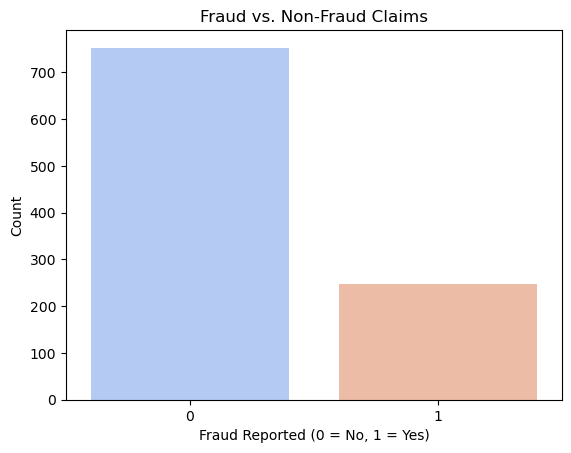

In [20]:
# Countplot of fraud vs. non-fraud
sns.countplot(x=data['fraud_reported'], palette='coolwarm')
plt.title('Fraud vs. Non-Fraud Claims')
plt.xlabel('Fraud Reported (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


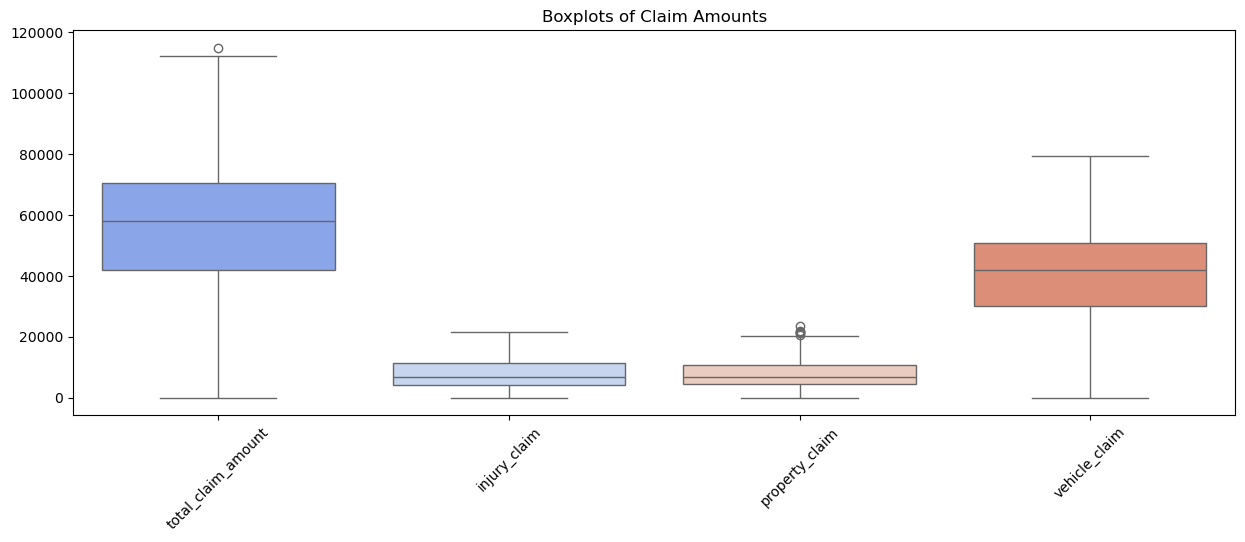

In [21]:
# Checking Anomalies in Claims
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']], palette='coolwarm')
plt.title('Boxplots of Claim Amounts')
plt.xticks(rotation=45)
plt.show()


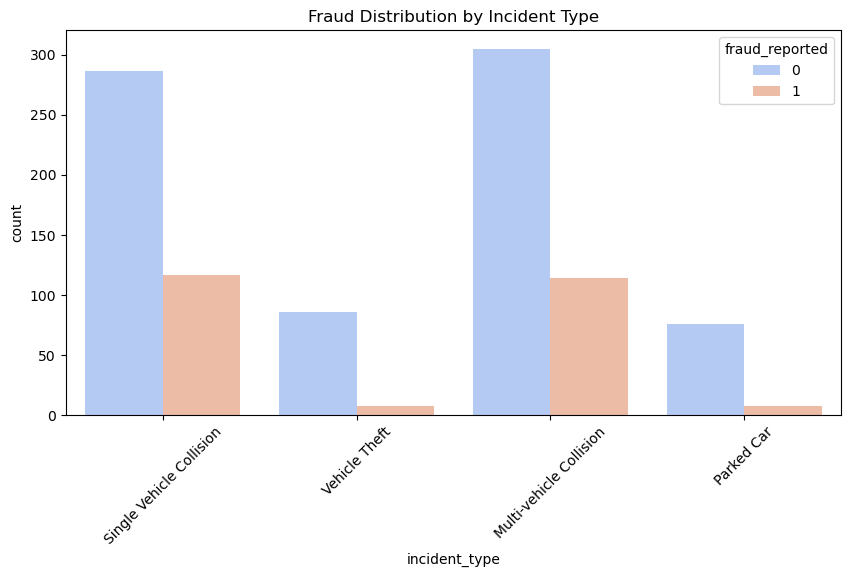

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['incident_type'], hue=data['fraud_reported'], palette='coolwarm')
plt.title('Fraud Distribution by Incident Type')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for inverse transformation if needed

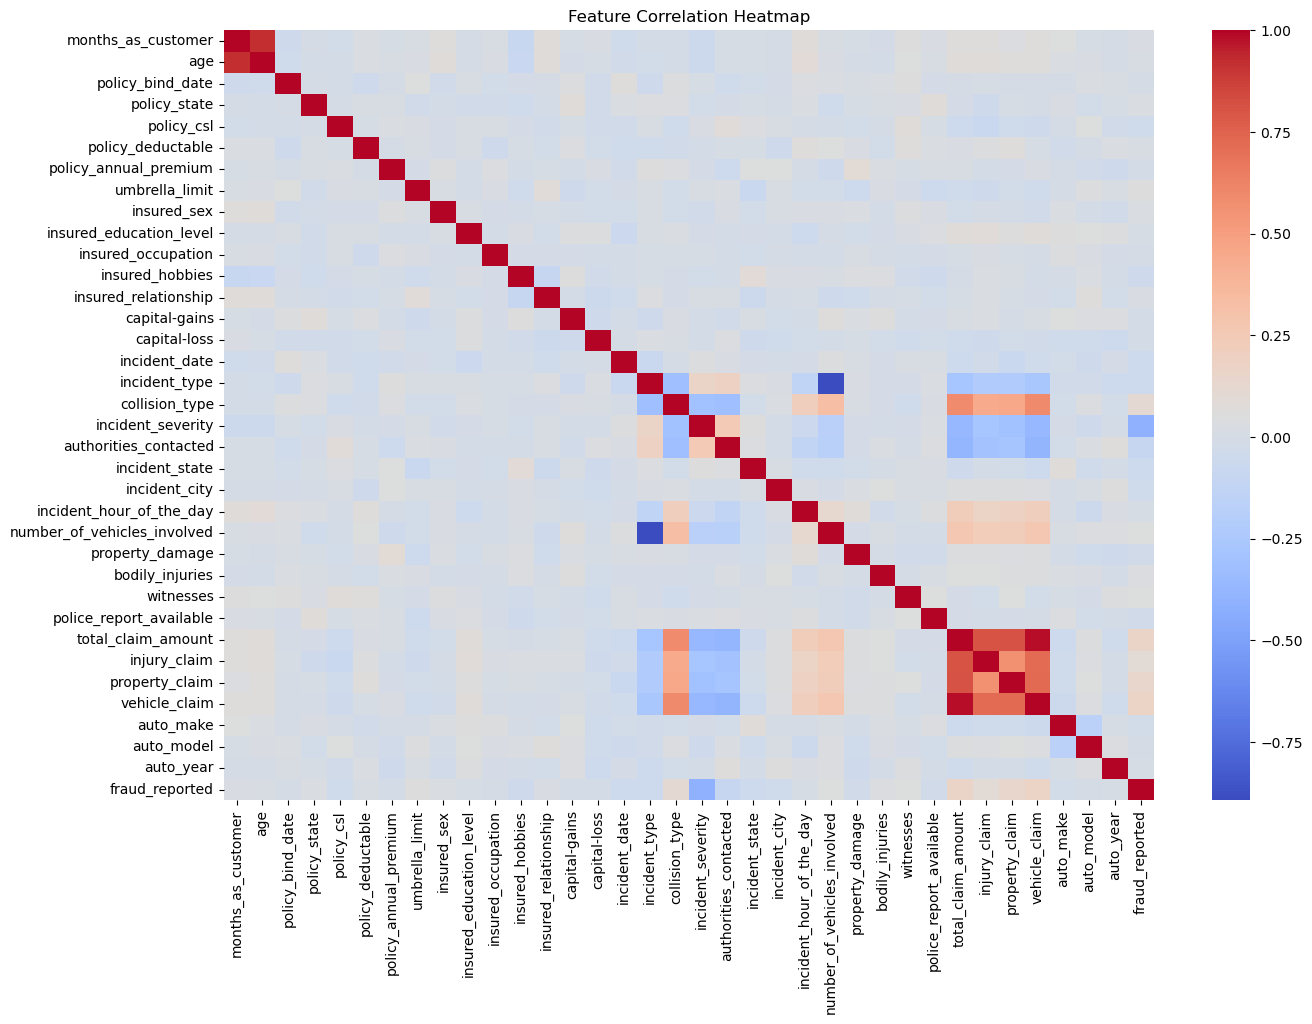

In [24]:
# Feature Correlation Analysis
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [25]:
# Find highly correlated features
threshold = 0.85
high_corr_features = set()
corr_matrix=data.corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print(f"Highly Correlated Features: {high_corr_features}")

# Drop highly correlated features
data.drop(columns=high_corr_features, inplace=True)

Highly Correlated Features: {'number_of_vehicles_involved', 'age', 'vehicle_claim'}


In [26]:
# Check class distribution
print("Class Distribution Before SMOTE:", Counter(data['fraud_reported']))

Class Distribution Before SMOTE: Counter({0: 753, 1: 247})


In [27]:
# Separate features and target variable
X = data.drop(columns=['fraud_reported'])  
y = data['fraud_reported']

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio if needed
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("Class Distribution After SMOTE:", Counter(y_resampled))

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class Distribution After SMOTE: Counter({0: 753, 1: 376})


In [28]:
# SCALING
# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling on features
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Check the shape after scaling
print("Scaled Features Shape:", X_resampled_scaled.shape)

Scaled Features Shape: (1129, 32)


## MODEL BUILDING

In [30]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape, "Test Set:", X_test.shape)


Training Set: (903, 32) Test Set: (226, 32)


### Train Classification Models


In [32]:
# Logistic Regression

# Train Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7787610619469026
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       147
           1       0.70      0.63      0.67        79

    accuracy                           0.78       226
   macro avg       0.76      0.75      0.75       226
weighted avg       0.77      0.78      0.78       226



In [33]:
# Random Forest (Better for non-linear data)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7831858407079646
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       147
           1       0.70      0.66      0.68        79

    accuracy                           0.78       226
   macro avg       0.76      0.75      0.76       226
weighted avg       0.78      0.78      0.78       226



In [34]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\Amritha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8584070796460177
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       147
           1       0.78      0.84      0.80        79

    accuracy                           0.86       226
   macro avg       0.84      0.85      0.85       226
weighted avg       0.86      0.86      0.86       226



## Multi-Layered Anomaly Detection

1.Autoencoders (Unsupervised Anomaly Detection)

In [37]:
# Build Autoencoder model
input_dim = X_resampled_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(X_resampled_scaled, X_resampled_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Get reconstruction error for anomaly detection
reconstruction_error = np.mean(np.square(X_resampled_scaled - autoencoder.predict(X_resampled_scaled)), axis=1)

# Set a threshold to classify anomalies
threshold = np.percentile(reconstruction_error, 95)  # Top 5% are anomalies
autoencoder_anomalies = reconstruction_error > threshold

print("Autoencoder Anomalies Detected:", sum(autoencoder_anomalies))


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 1.1925 - val_loss: 0.8512
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0181 - val_loss: 0.7651
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9816 - val_loss: 0.7552
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9459 - val_loss: 0.7201
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8900 - val_loss: 0.6876
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8479 - val_loss: 0.6655
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8150 - val_loss: 0.6409
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7791 - val_loss: 0.6317
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7578 - val_loss: 0.6180
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7351 - val_loss: 0.6089
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7246 - val_loss: 0.5982
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7

2. Isolation Forest (Unsupervised Anomaly Detection)

In [39]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_resampled_scaled)

# Predict anomalies (1 for normal, -1 for anomaly)
iso_forest_anomalies = iso_forest.predict(X_resampled_scaled)
iso_forest_anomalies = iso_forest_anomalies == -1

print("Isolation Forest Anomalies Detected:", sum(iso_forest_anomalies))

Isolation Forest Anomalies Detected: 57


## Combining the Results

In [41]:
# Combine Autoencoder and Isolation Forest anomaly indicators as new features
X_combined = np.hstack([X_resampled, autoencoder_anomalies.reshape(-1, 1), iso_forest_anomalies.reshape(-1, 1)])

# Train a final XGBoost model with these additional features
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_resampled, test_size=0.2, random_state=42)

xgb_combined_model = XGBClassifier(random_state=42)
xgb_combined_model.fit(X_train_combined, y_train_combined)

# Evaluate the final model
y_pred_combined = xgb_combined_model.predict(X_test_combined)
print(classification_report(y_test_combined, y_pred_combined))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       147
           1       0.76      0.81      0.79        79

    accuracy                           0.85       226
   macro avg       0.83      0.84      0.83       226
weighted avg       0.85      0.85      0.85       226



## OPTIMIZATION